In [106]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [107]:
df = yf.download('AAPL', start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [108]:
returns = np.log(1 + df['Adj Close'].pct_change())

In [109]:
no_of_days = 252
mu, sigma = returns.mean(), returns.std()

In [110]:
sim_returns = np.random.normal(mu, sigma, no_of_days)

In [111]:
initial_price = df['Adj Close'].iloc[-1]
print(initial_price)

195.8300018310547


In [112]:
sim_prices = initial_price*(sim_returns+1).cumprod()

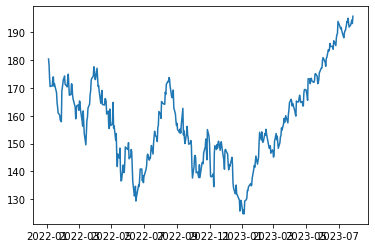

In [113]:
plt.plot(df['Adj Close'])

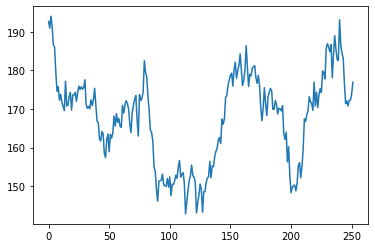

In [114]:
plt.plot(sim_prices)

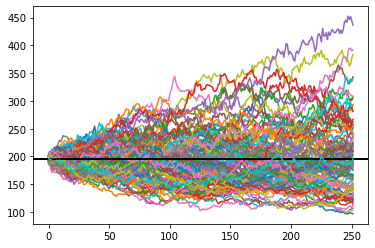

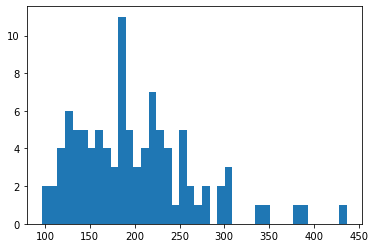

In [115]:
closing_prices = []
for i in range(100):
    sim_returns = np.random.normal(mu, sigma, no_of_days)
    sim_prices = initial_price*(sim_returns+1).cumprod()
    closing_prices.append(sim_prices[-1])
    plt.axhline(initial_price, c='k')
    plt.plot(sim_prices)
plt.show()
plt.hist(closing_prices, bins=40)
plt.show()

In [116]:
mean_end_price = round(np.mean(closing_prices),2)
print("Expected price: ", mean_end_price)

Expected price:  200.15


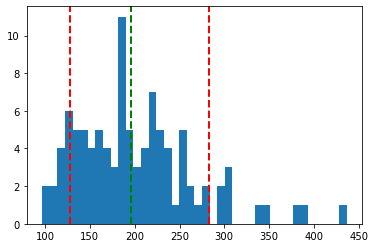

In [117]:
top_ten = np.percentile(closing_prices, 100-10)
bottom_ten = np.percentile(closing_prices, 10)
plt.hist(closing_prices, bins=40)
plt.axvline(top_ten, color='r', linestyle='dashed', linewidth=2)
plt.axvline(bottom_ten, color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['Adj Close'][-1], color='g', linestyle='dashed', linewidth=2)
plt.show()